In [4]:
import tensorflow as tf
import numpy as np
keras = tf.keras

In [5]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
#lets visualize our data
print(f'Review  {train_data[0]}') 
print('\n')
print(f'Label  {train_labels[0]}')

Review  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Label  1


In [7]:
word_index = imdb.get_word_index()                                    
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])            
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
reverse_word_index

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)                    

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [2]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(
    optimizer = 'rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
#lets a create a validation set 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.4981 - accuracy: 0.7907 - val_loss: 0.4549 - val_accuracy: 0.7915
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2933 - accuracy: 0.9032 - val_loss: 0.2979 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2151 - accuracy: 0.9315 - val_loss: 0.2767 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1692 - accuracy: 0.9461 - val_loss: 0.2960 - val_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1406 - accuracy: 0.9547 - val_loss: 0.2837 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1122 - accuracy: 0.9659 - val_loss: 0.3057 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0931 - accuracy: 0.9717 - val_loss: 0.3283 - val_accuracy: 0.8797
Epoch 8/20
30

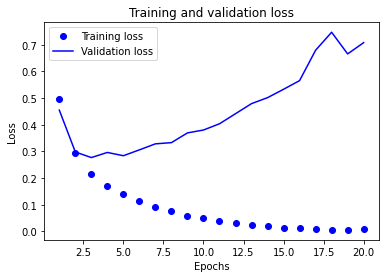

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')          
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

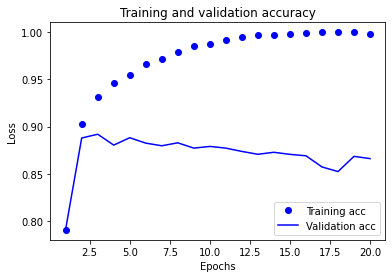

In [21]:
plt.clf()                                      
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4714 - accuracy: 0.8252
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2728 - accuracy: 0.9064
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2080 - accuracy: 0.9266
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3393 - accuracy: 0.8644


In [23]:
results

[0.33932802081108093, 0.8644000291824341]

In [24]:
model.predict(x_test)

array([[0.11893705],
       [0.999349  ],
       [0.52705616],
       ...,
       [0.0648818 ],
       [0.03957903],
       [0.30375373]], dtype=float32)

In [25]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 2s 37ms/step - loss: 0.4421 - accuracy: 0.8026
Epoch 2/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2395 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.1959 - accuracy: 0.9260
Epoch 4/4
49/49 [==============================] - 2s 37ms/step - loss: 0.1624 - accuracy: 0.9406


In [26]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3264 - accuracy: 0.8768


In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 3s 48ms/step - loss: 0.1445 - accuracy: 0.7978
Epoch 2/4
49/49 [==============================] - 2s 49ms/step - loss: 0.0698 - accuracy: 0.9093
Epoch 3/4
49/49 [==============================] - 2s 48ms/step - loss: 0.0534 - accuracy: 0.9308
Epoch 4/4
49/49 [==============================] - 2s 48ms/step - loss: 0.0397 - accuracy: 0.9495


In [28]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.0935 - accuracy: 0.8754


In [12]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='tanh'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 3s 34ms/step - loss: 0.6226 - accuracy: 0.7854
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.3898 - accuracy: 0.8905
Epoch 3/4
49/49 [==============================] - 2s 35ms/step - loss: 0.3294 - accuracy: 0.9081
Epoch 4/4
49/49 [==============================] - 2s 34ms/step - loss: 0.3071 - accuracy: 0.9248


In [13]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.8395 - accuracy: 0.8527
